# Introduction to Scikit-Learn (scikit)

This notebook demonstrates some of the most useful functions of the Scikit-Learn library
What we're going to cover:
* An end-to-end Scikit-Learn workflow
* Getting the data ready
* Choose the right estimator/algorithm for our problems
* FIt the model/algorithm/estimator and use it to make predicitons on our data
* Evaluating a model
* Improve a model
* Save and load a trained model
* Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Create X (Features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (label matrix)
y = heart_disease["target"]

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
clf.fit(X_train, y_train);

In [6]:
# Make a prediction
y_preds = clf.predict(X_test)

In [7]:
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [8]:
y_test

85     1
203    0
248    0
144    1
7      1
      ..
117    1
161    1
188    0
236    0
124    1
Name: target, Length: 61, dtype: int64

In [9]:
# 4. Evaluate the model
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.8360655737704918

In [11]:
print(f"Score: {clf.score(X_test, y_test)*100:.2f}%")

Score: 83.61%


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77        25
           1       0.81      0.94      0.87        36

    accuracy                           0.84        61
   macro avg       0.85      0.81      0.82        61
weighted avg       0.84      0.84      0.83        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[17,  8],
       [ 2, 34]])

In [14]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [15]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 101, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 83.61%

Trying model with 20 estimators...
Model accuracy on test set: 78.69%

Trying model with 30 estimators...
Model accuracy on test set: 77.05%

Trying model with 40 estimators...
Model accuracy on test set: 81.97%

Trying model with 50 estimators...
Model accuracy on test set: 85.25%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 78.69%

Trying model with 90 estimators...
Model accuracy on test set: 80.33%

Trying model with 100 estimators...
Model accuracy on test set: 80.33%



In [16]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8032786885245902

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
* Split the data into features and labels (usually `X` & `y`)
* Filling (imputing) or diregarding missing values
* Converting non-numerical values to numerical values (feature encoding)

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [23]:
len(heart_disease)

303

# 1.1 Make sure it's all numerical 

In [24]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [27]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [28]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [29]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [30]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [31]:
# Encode categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [33]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [34]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model.fit(X_train,y_train)

NameError: name 'model' is not defined

In [ ]:
score = model.score(X_test, y_test)
score

In [ ]:
print(f"Score: {score*100:.2f}%")

## 1.2 What if there were missing values?
* Fill them with some value (impute).
* Remove the samples with missing data altogether

In [ ]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
# Let's try and convert our data to numbers
# Encode categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
car_sales_missing

### Option 1: Fill missing data with Pandas

In [ ]:
car_sales_missing["Doors"].value_counts()

In [ ]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [ ]:
car_sales_missing

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

## Option 2: Fill missing values with Scikit-Learn

In [ ]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Drop rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

In [ ]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
X.isna().sum()

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (fills the missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

In [ ]:
# Let's try and convert our data to numbers
# Encode categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

In [ ]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
len(car_sales_filled), len(car_sales)

## 2. Choosing the right estimator/algorithm for your problem
Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf` - (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

For choosing the model, refer to sklear machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset

In [94]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [95]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

In [96]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [97]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [98]:
housing_df = housing_df.drop("MedHouseVal",axis=1)

In [99]:
housing_df['target'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Import algorithm / estimator
from sklearn.linear_model import Ridge

# Setup random seet
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # Median house price in $100,000s

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

### Ensemble model
Sklearn's ensemble methods can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [100]:
from sklearn.ensemble import RandomForestRegressor

# Random seed
np.random.seed(42)

# Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model
model.score(X_test, y_test)

0.8066196804802649

## 2.2 Picking a machine learning model for a classification model

In [38]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
len(heart_disease)

303

In [40]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Random seed
np.random.seed(42)

# Prepare the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate LinearSVC
clf.score(X_test, y_test)

/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [41]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [42]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 

# Random seed
np.random.seed(42)

# Prepare the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

## Tidbit:
* If you have structured data, use ensemble methods
* If you have unsrtuctured data, use deep learning or transer learning

## 3. Fit the model on our data

### 3.1 Fitting the model to the data
* `X` - features, feature variables, data
* `y` - labels, target variables, targets

In [43]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 

# Random seed
np.random.seed(42)

# Prepare the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data
clf.fit(X_train, y_train)

# Evaluate RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

In [44]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [45]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## 3.2 Make predictions using a machine learning model
2 ways to make predictions:
* `predict()`
* `predict_proba()`

In [46]:
# Use trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [47]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [48]:
clf.score(X_test, y_test)

0.8524590163934426

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [50]:
# Make predictions with predict_proba()
# Returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [51]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [52]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used for regression models

In [101]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [102]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Prepare the data
X = housing_df.drop("target", axis=1)
y = housing_df['target']

# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [55]:
y_preds[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [56]:
np.array(y_test[:10])

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [57]:
len(y_preds), len(y_test)

(61, 61)

In [58]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.14754098360655737

In [103]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# 4. Evaluating a machine learning model

Three ways to evaluate scikit-learn models:
* Estimator's built-in `score()` method
* The `scoring` parameter
* Problem-specific metric functions
Read more about it here: https://scikit-learn.org/stable/modules/model_evaluation.html

## 4.1 Evaluating a model with the `score` method

In [60]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# Fit classifier to training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# Evaluate the model (on train data)
score = clf.score(X_train, y_train)
print(f"Score: {score}\nScore: {score*100:.2f}%")

Score: 1.0
Score: 100.00%


In [62]:
# Evaluate the model (on test data)
# The default score() evaluation metric is r_squared for regression algorithms
score = clf.score(X_test, y_test)
print(f"Score: {score}\nScore: {score*100:.2f}%")

Score: 0.8524590163934426
Score: 85.25%


## 4.2 Evaluating a model with the `scoring` method

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# Fit classifier to training data
clf.fit(X_train, y_train);

In [64]:
clf.score(X_test, y_test)

0.8524590163934426

In [65]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [66]:
np.random.seed(42)

# Single train and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [67]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X_test, y_test)

0.8524590163934426

In [68]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
* Accuracy
* Area under ROC curve
* Confusion matrix
* Classification report

Accuracy

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [70]:
np.mean(cross_val_score)

0.8248087431693989

In [71]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


In [72]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (TPR) vs a model's false positive rate (FPR)

In [73]:
# Create X_test...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10] 

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [75]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [76]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

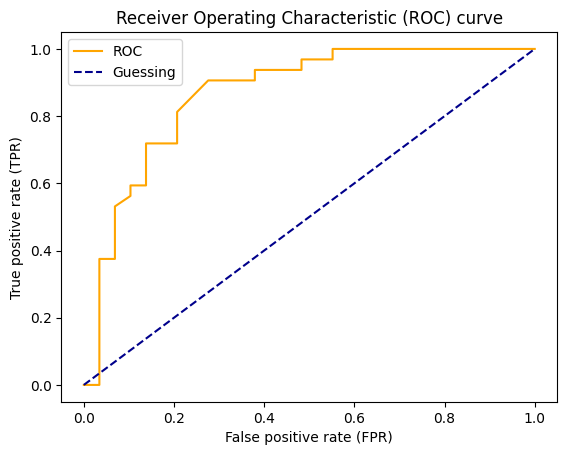

In [77]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (FPR)
    and true positive rate (TPR) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    # Customize the plot
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [78]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

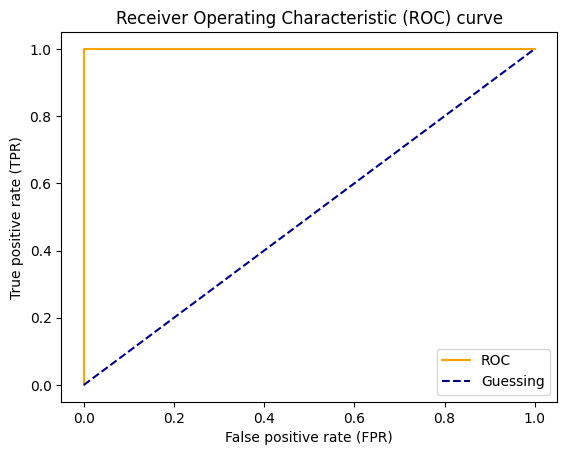

In [79]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [80]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a module predicts and the actual labels it was supposed to predict.

In [81]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [82]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


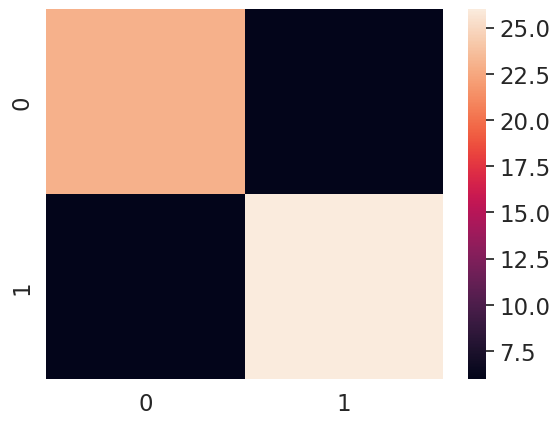

In [84]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using heatmap
sns.heatmap(conf_mat);

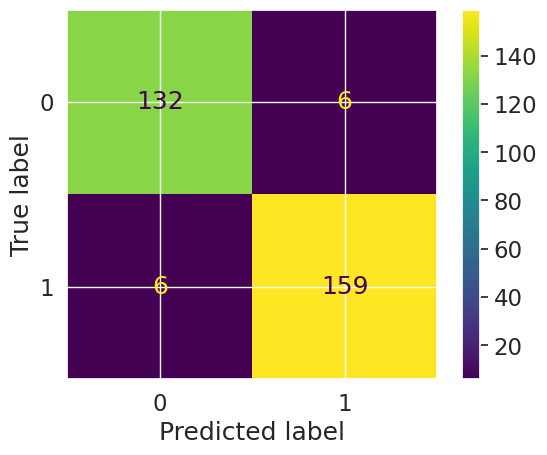

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

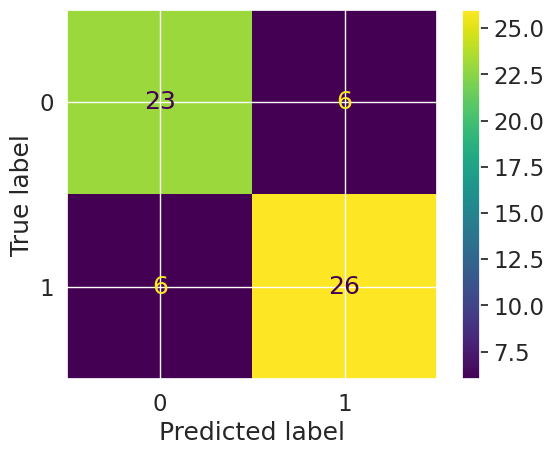

In [89]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

**Classification Report**

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [91]:
# Where precision and recall become valuable

diseas_true = np.zeros(10000)
diseas_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(diseas_true,
                                   disease_preds,
                                   output_dict=True))

/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

The ones to cover:
* R^2 (r-squared) or coefficient of determination
* Mean absolute error (MAE)
* Mean squared error (MSE)

In [106]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train);

In [105]:
model.score(X_test, y_test)

0.8066196804802649

In [107]:
housing_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [108]:
y_test.mean()

2.0550030959302323

In [109]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [110]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [111]:
r2_score(y_true=y_test, 
         y_pred=y_test_mean)

0.0

In [112]:
r2_score(y_true=y_test, 
         y_pred=y_test)

1.0

**Mean absolute erroer (MAE)**

Average of the absolute differences between predictions and actual values
It gives an idea how wrong model predictions are

In [114]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [115]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [116]:
df["differences"].mean()

0.0121069218749996

In [119]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3265721842781009

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [121]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [122]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [123]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534073069137548

In [128]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

/tmp/ipykernel_123567/3409892222.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


In [129]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [130]:
df_large_error["squared_differences"].mean()

0.25728320720794084

In [135]:
df_large_error.iloc[2:100] = 20
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.477,0.49384,0.01684,16.0
3024,0.458,0.75494,0.29694,20.0
15663,20.000,20.00000,20.00000,20.0
20484,20.000,20.00000,20.00000,20.0
9814,20.000,20.00000,20.00000,20.0


### 4.2.3 Using the `scoring` parameter

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [137]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, estimator's default scoring evaluation metric is used (accuracy for RFC)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [139]:
# Cross-validated accuarcy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [140]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [141]:
# Cross-validated accuarcy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [142]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [147]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [150]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [151]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see the `scoring` parameter being used for regression problem

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [154]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [155]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [157]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.461228671470042

In [158]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4843843314777132

In [159]:
cv_mae

array([-0.52205104, -0.4256331 , -0.50546886])

In [160]:
cv_mse

array([-0.51324679, -0.32925916, -0.54118007])

# 4.3 Using different evaluation metrics as Scikit-Learn functions

Use the `sklearn.metrics` module: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier(n_estimators=100)
# Set seed
np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluate functions
print(f"Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, clf.predict(X_test))*100:.2f}%")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, clf.predict(X_test))}")
print(f"Recall: {recall_score(y_test, clf.predict(X_test))}")
print(f"F1: {f1_score(y_test, clf.predict(X_test))}")

Classifier metrics on the test set
Accuracy: 85.25%
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [177]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Set seed
np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluate functions
print(f"Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE score: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE score: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8066196804802649
MAE score: 0.3265721842781009
MSE score: 0.2534073069137548


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (Usually the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

**Hyperparameters vs Parameters**
* Parameters = model finds these patterns in data
* Hyperparameters = settings on a model you can adjusto to (potentially) improve it's ability to find patterns

**Three ways to adjust hyperparameters**
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [178]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [179]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets - training, validation and test

In [180]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [191]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels
    on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall,2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    return metric_dict

In [183]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [186]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [189]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [192]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baselinepredictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Accuracy: 84.44%
Precision: 0.85
Recall: 0.88
F1: 0.86


In [193]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the second classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


In [194]:
# Create a third classifier with different hyperparameters
clf_3 = RandomForestClassifier(n_estimators=100,
                               max_depth=10)
clf_3.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the second classifier
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


## 5.2 Hyperparameter tuning with RandomizedSearchCV

In [197]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # Number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    val

In [198]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [199]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [200]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [201]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2, ]}

In [202]:
grid_2

{'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [203]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/kostas/Documents/git/ZTM_ML/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    val

In [204]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [205]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


Let's compare our different models metrics.

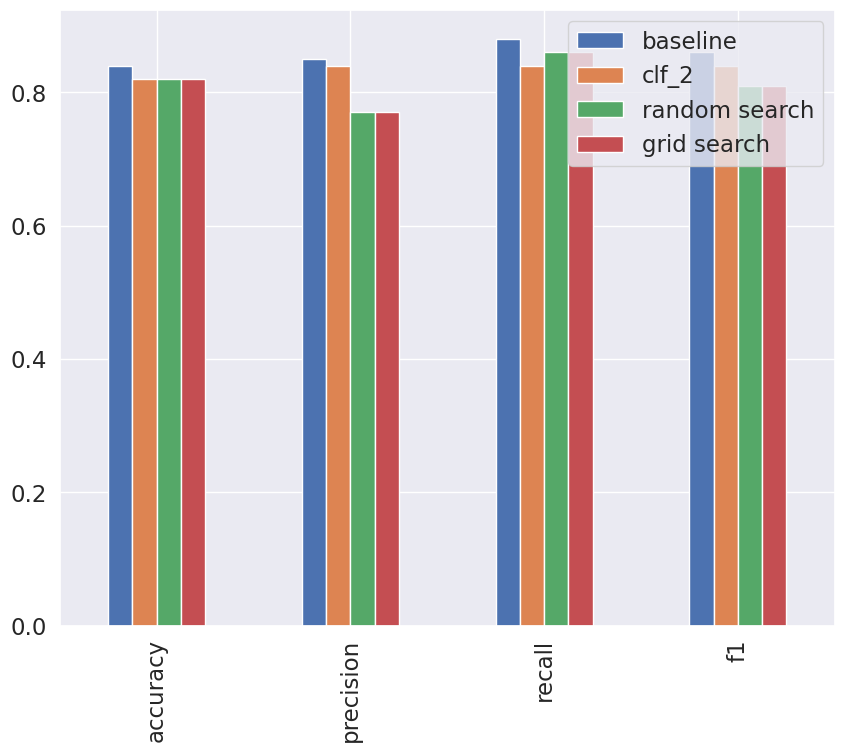

In [206]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving an loading trained machine learning models

Two ways to save and load ML models:
* Python `pickle` module
* Python `joblib` module

In [207]:
import pickle

# Save and existing model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))

In [208]:
# Load a saved model
load_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))

In [209]:
# Make some predictions
pickle_y_preds = load_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib**

In [210]:
from joblib import dump, load
# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [211]:
# Import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [ ]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, )